<a href="https://colab.research.google.com/github/bridget-mullen/Analysis_Projects/blob/main/MIT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module 1 MIT Analysis

 **Using scipy.stats to work with binomial distributions.**

In [ ]:
import scipy

p = 0.00203
n =  31000
k = 39
bin = scipy.special.comb(n, k)
print(bin*(p**k)*(1-p)**(n-k))

0.00032506462731933495


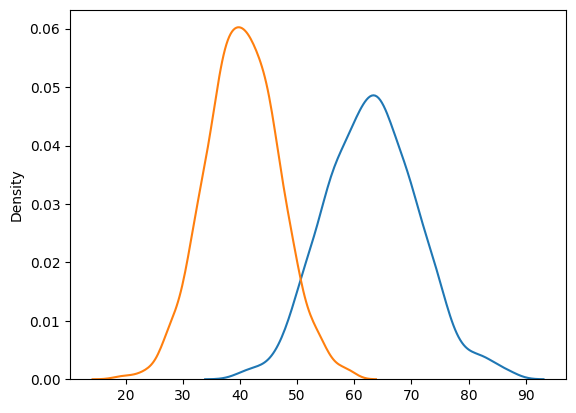

0.0006898586509908568

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

x = random.binomial(n, p, size=1000)
x2 = random.binomial(n, .0013, size=1000)
sns.kdeplot(data = x)
sns.kdeplot(x2)

plt.show()
scipy.stats.binom.pmf(39, 30000, p)

In [ ]:
from scipy.stats import binomtest
result = binomtest(31, 30000, p, alternative='less')
result.pvalue


1.772680166648516e-05

## Fisher Exact test

In [ ]:
import scipy
import numpy as np

table = np.array([[39, 63],[30961, 30937]])
res = scipy.stats.fisher_exact(table, alternative= "less")
res.pvalue


0.011094091841433758

In [ ]:
import math
n=33
l= 1/42.6
Sn= 33*42.6

print(2*(n*math.log(l)-l*Sn-n*math.log(.03)+.03*Sn))

2.1584405069473434


In [ ]:
print(scipy.stats.norm.cdf(-3.0268))

0.0012357871459340907


## Calculate p value for data using **student t test**

In [ ]:
import math
x= np.array([.9, -.9, 4.3, 2.9, 1.2, 3, 2.7, .6, 3.6, -.5])
print(scipy.stats.describe(x))

DescribeResult(nobs=10, minmax=(-0.9, 4.3), mean=1.78, variance=3.1262222222222227, skewness=-0.1608179456913449, kurtosis=-1.2685609092001975)


In [ ]:
t = 1.78*math.sqrt(10/3.1262222222)
print(t)
1-scipy.stats.t.cdf(t, 9)

3.1835383022301884


0.005560692749183582

In [ ]:
(1 - scipy.stats.t.cdf(x=t, df=9)) * 2

0.011121385498367165

### calculate log likelihood statistic for breast cancer study where treatment deaths are 39/31000 and control deaths are 63/31000 using binomial distribution
use chisquare test to get p value- survival function (sf) is 1-cdf

In [ ]:
import math
a= scipy.stats.binom.pmf(39, 31000, 102/62000)
print(a)
z = scipy.stats.binom.pmf(63, 31000, 102/62000)
b= scipy.stats.binom.pmf(39, 31000, 39/31000)
print(b)
c= scipy.stats.binom.pmf(63, 31000, 63/31000)
print(c)
log_l = (-2*math.log(a*z/(b*c)))
print(log_l)

0.013674024512554268
0.06378567544145829
0.05024664607042506
5.70966047976218


In [ ]:
p_val = scipy.stats.chi2.sf(log_l, 1)
print(p_val)

0.01687180219594272


### Hubble Data Problems

In [ ]:
import numpy as np

Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24
#find means
print(Xs.mean(), Ys.mean())

0.9199250000000001 425.6175


In [ ]:
#find sample standard deviations- set ddof= 1 since np.std yields population sd
Xstd = Xs.std(ddof=1)
Ystd= Ys.std(ddof=1)
print(Xs.std(ddof=1), Ys.std(ddof=1))

0.6533948258734996 348.7336574977229


In [ ]:
#find sample covarience (martix is [aa, ab][ab, bb])
print(np.cov(Xs, Ys))

[[4.26924798e-01 1.91207065e+02]
 [1.91207065e+02 1.21615164e+05]]


In [ ]:
#write your own covarience fxn
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)
print(cov(Xs, Ys))

191.20706528260868


In [ ]:
#quick np array version
XYcov = np.sum((Xs-Xs.mean())*(Ys-Ys.mean()))/(N-1)
print(XYcov)

191.20706528260868


In [ ]:
#calculate correlation coefficent, three differnt ways
import scipy
XYcorr= np.sum(((Xs-Xs.mean())/Xs.std(ddof=1))*((Ys-Ys.mean())/Ys.std(ddof=1)))/(N-1)
XYr = XYcov/(Xstd*Ystd)
print(XYcorr)
print(scipy.stats.pearsonr(Xs, Ys))
print(np.corrcoef(Xs, Ys))

0.8391399162310663
PearsonRResult(statistic=0.8391399162310662, pvalue=2.994565602899767e-07)
[[1.         0.83913992]
 [0.83913992 1.        ]]


In [ ]:
#for hubble data find the Beta_1 parameter which is equal to corr_coef*Std(y)/std(x)
B_1 = XYcorr*Ystd/Xstd
print(B_1)

447.87059914099837


In [ ]:
#find B_0 using means of samples, Ybar = Xbar*B_1+B_0
B_0= Ys.mean()-Xs.mean()*B_1
print(B_0)

13.610139085217043


## Extra python code for class

In [ ]:
#For example, a scatter plot can be creating using

import matplotlib.pyplot as plt # import the library
plt.scatter(Xs, Ys) # Create the scatter plot, Xs and Ys are two numpy arrays of the same length
plt.show() # Display the plot you just created.
A line plot can be created using

plt.plot(Xs, Ys)
#This will draw a line through the X, Y pairs defined by the Xs and Ys numpy arrays.

#When working with matrices, numpy provides some convenient facilities. For example, to find the inverse of a matrix, use

import numpy as np
np.linalg.inv(matrix_to_invert)
The scipy package provides statistical distributions. For example, to calculate p-values for the t-distribution, you can use the survival function (sf):

import scipy.stats
scipy.stats.t.sf(T, num_degrees_of_freedom)


### Calculating Planetary Orbits
each (Xs, Ys) data pair represents a planet.

*   Xs values are semi-major axises around Sun measured in AU's (earths orbit it 1 AU)
*   Ys values are orbital periods measured in Earth years

We want to see if there is a linear relationship between the variables. so we:


*   Plot data
*   find correlation coefficient
*   Plot the residuals to see if evenly distributed
*   Make q-q plots to see if gaussian
*   Try transforming x and y to find a better fit use log and powers









In [ ]:
import numpy as np
import scipy
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

In [ ]:
#calculate correlation coefficient

Xstd = Xs.std(ddof=1)
Ystd = Ys.std(ddof=1)
XYCov = np.sum((Xs-Xs.mean())*(Ys-Ys.mean()))/(N-1)
r = XYCov/(Xstd*Ystd)
print(r)

#with bulit in fxn
print(np.corrcoef(Xs, Ys))
print(scipy.stats.pearsonr(Xs, Ys))


0.9888323018726735
[[1.        0.9888323]
 [0.9888323 1.       ]]
PearsonRResult(statistic=0.9888323018726735, pvalue=4.793856920237897e-07)


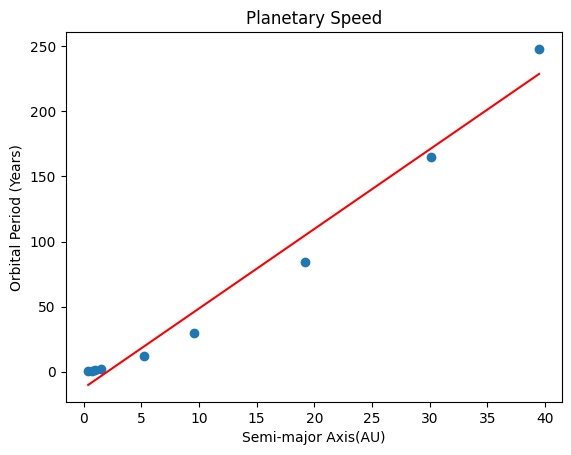

In [ ]:
#Plot data
import matplotlib.pyplot as plt
plt.scatter(Xs, Ys) # Create the scatter plot, Xs and Ys are two numpy arrays of the same length
slope, intercept = np.polyfit(Xs, Ys, 1)
plt.plot(Xs, Xs*slope + intercept, 'r')
plt.xlabel("Semi-major Axis(AU)")
plt.ylabel("Orbital Period (Years)")
plt.title("Planetary Speed")

plt.show() # Display the plot you just created.






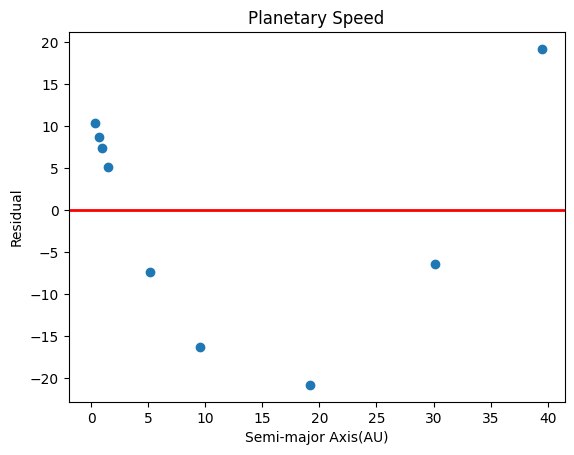

In [ ]:
# looks like there is a linear relationship, but lets plot the residuals
y_hat = slope*Xs +intercept
e = Ys- y_hat

plt.scatter(Xs, e)
plt.axline((0, 0), (20, 0), linewidth=2, color='r')
plt.xlabel("Semi-major Axis(AU)")
plt.ylabel("Residual")
plt.title("Planetary Speed")

plt.show() # Display the plot you just created.



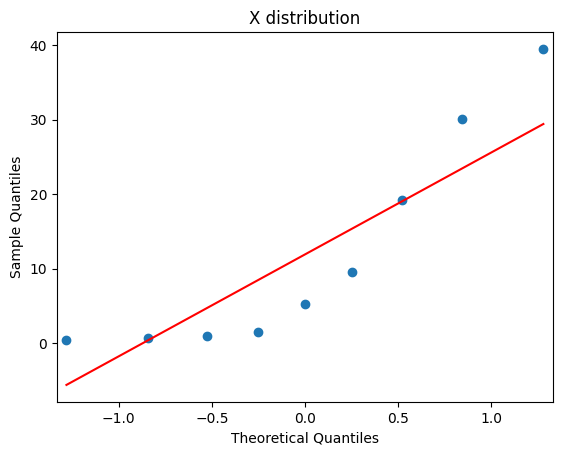

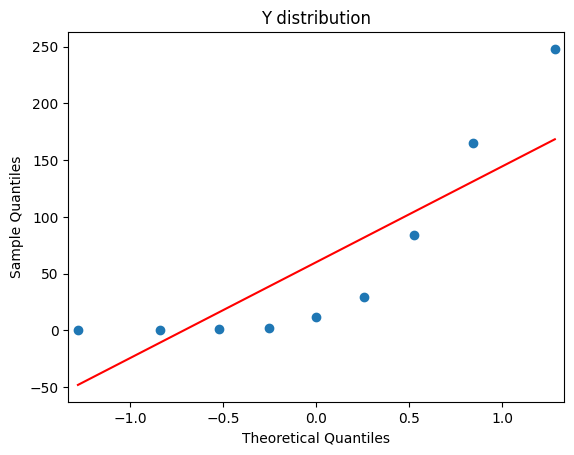

In [ ]:
#creating a q-q plot

import statsmodels.api as sm

sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()

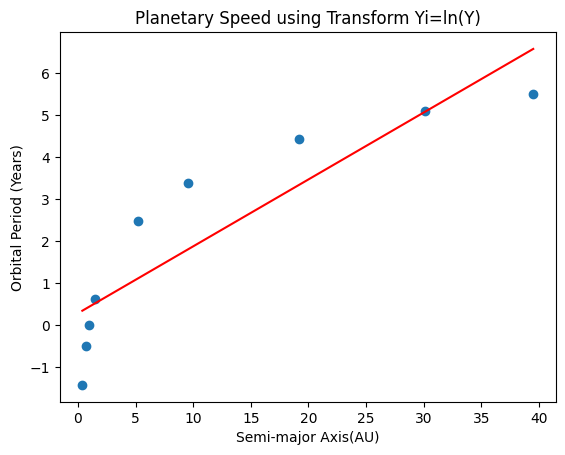

In [ ]:
#explore different relationship between x and y
#y_i = ln(y)

Y_i = np.log(Ys)
plt.scatter(Xs, Y_i) # Create the scatter plot, Xs and Ys are two numpy arrays of the same length
slope, intercept = np.polyfit(Xs, Y_i, 1)
plt.plot(Xs, Xs*slope + intercept, 'r')
plt.xlabel("Semi-major Axis(AU)")
plt.ylabel("Orbital Period (Years)")
plt.title("Planetary Speed using Transform Yi=ln(Y)")

plt.show() # Display the plot you just created.




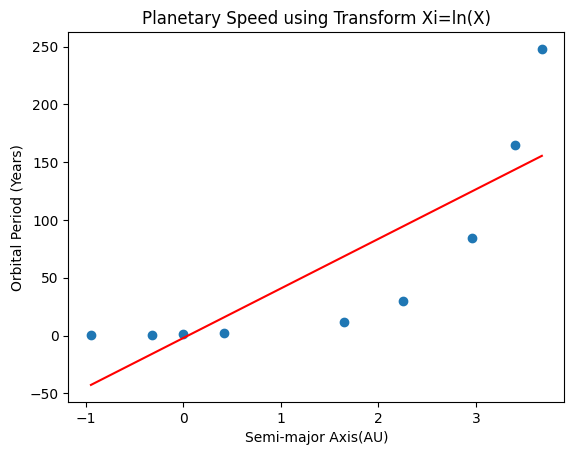

In [ ]:
#explore different relationship between x and y
#X_i = ln(x)

X_i = np.log(Xs)
plt.scatter(X_i, Ys) # Create the scatter plot, Xs and Ys are two numpy arrays of the same length
slope, intercept = np.polyfit(X_i, Ys, 1)
plt.plot(X_i, X_i*slope + intercept, 'r')
plt.xlabel("Semi-major Axis(AU)")
plt.ylabel("Orbital Period (Years)")
plt.title("Planetary Speed using Transform Xi=ln(X)")

plt.show() # Display the plot you just created.



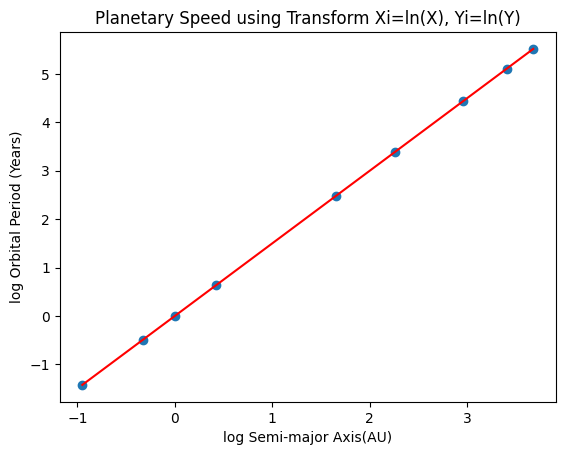

slope = 1.4995325773381891
[[1.         0.99999981]
 [0.99999981 1.        ]]


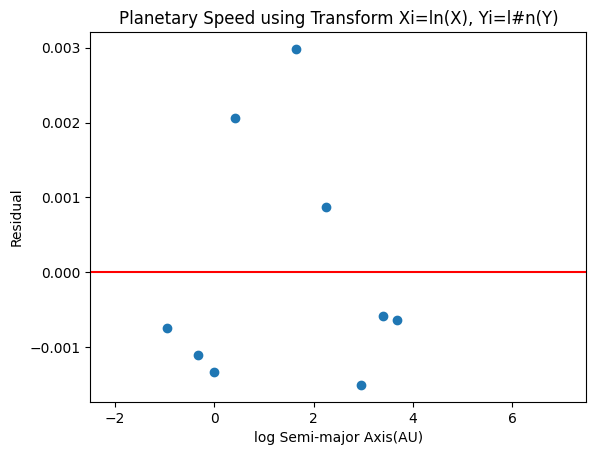

In [ ]:
#explore different relationship between x and y
#X_i = ln(x) and Y_i = ln(Y)
X_i = np.log(Xs)
Y_i = np.log(Ys)
plt.scatter(X_i, Y_i) # Create the scatter plot, Xs and Ys are two numpy arrays of the same length
slope, intercept = np.polyfit(X_i, Y_i, 1)
plt.plot(X_i, X_i*slope + intercept, 'r')
plt.xlabel("log Semi-major Axis(AU)")
plt.ylabel("log Orbital Period (Years)")
plt.title("Planetary Speed using Transform Xi=ln(X), Yi=ln(Y)")

plt.show() # Display the plot you just created.
print("slope =", slope)

#Make q-q plots to see if gaussian

#this looks good let plot residuals and calculate correlation coeff
print(np.corrcoef(X_i, Y_i))

y_hat = slope*X_i + intercept
e = Y_i - y_hat
plt.scatter(X_i, e) # Create the scatter plot, Xs and Ys are two numpy arrays of the same length
plt.axline((0,0), (20,0), color = 'r')
plt.xlabel("log Semi-major Axis(AU)")
plt.ylabel("Residual")
plt.title("Planetary Speed using Transform Xi=ln(X), Yi=l#n(Y)")
plt.xlim([-2.5, 7.5])
plt.show() # Display the plot you just created.




In [ ]:
#lets find the slope (k) and intercept (w) for the transformed line
XY_iCorr= np.corrcoef(X_i, Y_i)
Sx= X_i.std(ddof = 1)
Sy =Y_i.std(ddof = 1)
k = XY_iCorr*Sy/Sx
print(k)

[[1.49953286 1.49953258]
 [1.49953258 1.49953286]]


# For this exercise, we will perform multiple linear regression on some exoplanetary data to see if we can find a relationship that can predict the mass of an exoplanet.



*   **LogPlanetMass** is the logarithm of the observed exoplanet's mass in units of Jupiter's mass. A LogPlanetMass of zero is an exoplanet with the same mass as Jupiter. Jupiter is used as a convenient comparison, as large gas giants are the most easily detected, and thus most commonly observed, kind of exoplanet.
*  **LogPlanetRadius** is the logarithm of the observed exoplanet's radius in units of Jupiter's radius, for much the same reason. LogPlanetOrbit is the logarithm of the observed planet's semi-major axis of orbit, in units of AU.
*   **StarMetallicity** is the relative amount of metals observed in the parent star. It is equal to the logarithm of the ratio of the observed abundance of metal to the observed abundance of metal in the Sun. The Sun is a quite average star, so it serves as a good reference point. The most common metal to measure is Iron, but astronomers define any element that isn't Hydrogen or Helium as a metal.
*   **LogStarMass** is the logarithm of the parent star's mass in units of the Sun's mass.

*   **LogStarAge** is the logarithm of the parent star's age in giga-years.









In [ ]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30
p = 6

Y= LogPlanetMass
X = np.stack((np.ones(30), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge), axis = 1)
#Xmat = np.array((np.ones_like(LogPlanetRadius), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge))
B = np.linalg.inv(X.T@X)@X.T@Y
print(B)


[ 0.15379303  1.40214538 -0.14099818 -1.59951364 -0.95610919 -0.46176234]


Now we will look at the exo planet data and:

  
*   Create a statistical test for the significance of a predictor in multiple linear regression.

* Derive the statistical distribution for this test.

* Apply the significance test to the exoplanetary data in order to assess the strength of the predictors.



In [ ]:
Cov_mat = np.linalg.inv(X.T @ X)
sigma_2 = np.sum(np.power((Y- X@B), 2))/(N-p)
sigma = np.sqrt(sigma_2)
print(sigma)
test = np.zeros(p)
for i in range(p):
  test[i]=B[i]/(sigma_2*np.sqrt(Cov_mat[i,i]))
print(test)

1.0998975179286803
[ 0.10066634  4.45005219 -0.3562957  -1.16287806 -0.77826612 -1.12990944]


In [ ]:
import scipy.stats
pvals = scipy.stats.t.sf(np.abs(test),N- p)*2
print(pvals)


[9.20651572e-01 1.68177333e-04 7.24732287e-01 2.56311649e-01
 4.44017734e-01 2.69680989e-01]
